In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df1=pd.read_csv('/content/drive/My Drive/janmay2018.csv')
df2=pd.read_csv('/content/drive/My Drive/junedec2018.csv')
df3=pd.read_csv('/content/drive/My Drive/janmay2019.csv')
df4=pd.read_csv('/content/drive/My Drive/junedec2019.csv')
df5=pd.read_csv('/content/drive/My Drive/janmay2020.csv')

In [ ]:
pdList = [df1, df2, df3,df4,df5]  
df = pd.concat(pdList)

In [ ]:
df.shape

(14003199, 9)

In [ ]:
df

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2018-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.431697,51.623846,On or near Cavell Road,E01021243,Basildon 003D,Violence and sexual offences
1,2018-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509930,51.410873,On or near Ludlow Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
2,2018-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
3,2018-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Burglary
4,2018-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Other theft
...,...,...,...,...,...,...,...,...,...
2490407,2020-05,Wiltshire Police,Wiltshire Police,-1.759533,50.992704,On or near Greenacres,E01031995,Wiltshire 062E,Anti-social behaviour
2490408,2020-05,Wiltshire Police,Wiltshire Police,-1.757960,50.996685,On or near Scott'S Close,E01031995,Wiltshire 062E,Burglary
2490409,2020-05,Wiltshire Police,Wiltshire Police,-1.757983,50.992242,On or near The Headlands,E01031995,Wiltshire 062E,Burglary
2490410,2020-05,Wiltshire Police,Wiltshire Police,-1.757983,50.992242,On or near The Headlands,E01031995,Wiltshire 062E,Burglary


In [ ]:
df['month']=pd.DatetimeIndex(df['Month']).month

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Month']).year

In [ ]:
df['Year']=df['Year'].astype(str)

In [ ]:
# plt.rcParams['figure.figsize'] = (20, 15)
# plt.ticklabel_format(style='plain', axis='y')
# sns.countplot(df['Crime type'], palette = 'gnuplot')

# plt.title('Major Crimes in UK', fontweight = 30, fontsize = 20)
# plt.xticks(rotation = 90)
# plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



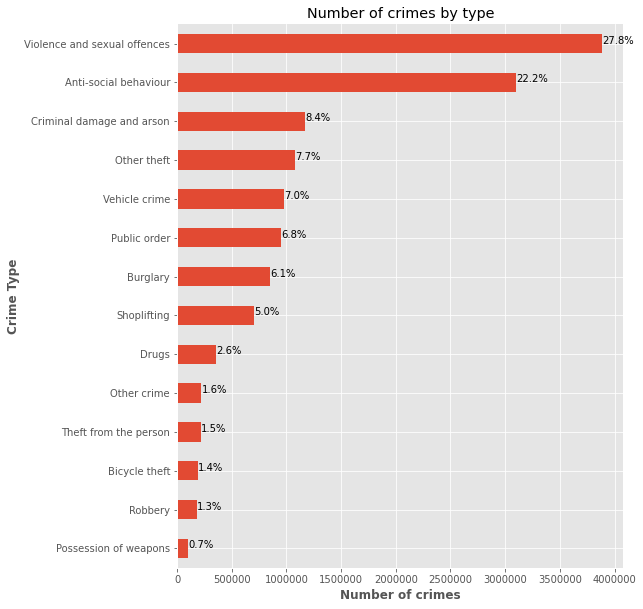

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,10))
df.groupby([df['Crime type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.ticklabel_format(style='plain', axis='x')

ax=plt.axes()
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
total = len(df['Reported by'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Number of crimes by type')
plt.ylabel('Crime Type',weight='bold', size=12)
plt.xlabel('Number of crimes',weight='bold', size=12)
plt.show()

plt.savefig('types.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



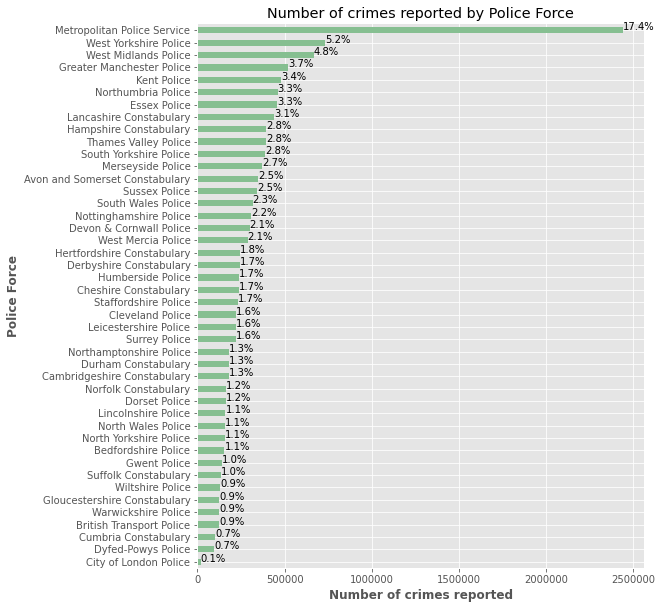

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,10))
df.groupby([df['Reported by']]).size().sort_values(ascending=True).plot(kind='barh',color='#86bf91')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number of crimes reported by Police Force')
plt.ylabel('Police Force',weight='bold', size=12)
plt.xlabel('Number of crimes reported',weight='bold', size=12)
ax=plt.axes()
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
total = len(df['Reported by'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

plt.savefig('pf.png')

In [ ]:
mon_wise=df.groupby('month')['Crime type'].count().reset_index().rename(columns = {'Crime type':'Number of Crimes'})

In [ ]:
mon_wise

,month,Number of Crimes
0,1,1001520
1,2,1292444
2,3,1391392
3,4,1422545
4,5,1506754
5,6,1106799
6,7,1145610
7,8,1077849
8,9,1017458
9,10,1074908


In [ ]:
mon_wise['month']=mon_wise['month'].astype(str)

In [ ]:
# mon_wise["month"] = mon_wise["month"].str.capitalize()
# mon_wise["month"] = pd.to_datetime(mon_wise.month, format='%b', errors='coerce').dt.month
# mon_wise = mon_wise.sort_values(by="month")

In [ ]:
# mon_wise

In [ ]:
month_dict={'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

In [ ]:
mon_wise['month']=mon_wise['month'].map(month_dict)

In [ ]:
mon_wise

,month,Number of Crimes
0,Jan,1001520
1,Feb,1292444
2,Mar,1391392
3,Apr,1422545
4,May,1506754
5,Jun,1106799
6,Jul,1145610
7,Aug,1077849
8,Sept,1017458
9,Oct,1074908


In [ ]:
fig = px.bar(mon_wise, x='month', y='Number of Crimes', color='Number of Crimes', height=600)
fig.update(layout_showlegend=False)
fig.show()

In [ ]:
# BBox = ((df.Longitude.min(),   df.Longitude.max(),      
#          df.Latitude.min(), df.Latitude.max()))

In [ ]:
# BBox

In [ ]:
# mymap=plt.imread('/content/drive/My Drive/map.png')

In [ ]:
# fig, ax = plt.subplots(figsize = (8,7))
# ax.scatter(df1.Longitude, df1.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
# ax.set_title('Plotting Crime Data on UK Map')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
loc_crime_count2018 = df.groupby(['Location', 'Year'])['Crime type'].count().reset_index().rename(columns = {'Crime type':'Number of Crimes'})
loc_crime_count2018=loc_crime_count2018[loc_crime_count2018['Year']=='2018']
loc_crime_count2018.sort_values(by='Number of Crimes',ascending=False,inplace=True)

In [ ]:
loc_crime_count2018=loc_crime_count2018.head(10)
fig = px.bar(loc_crime_count2018, x='Location', y='Number of Crimes', color='Number of Crimes', height=600)
fig.update()
fig.show()

In [ ]:
loc_crime_count2019 = df.groupby(['Location', 'Year'])['Crime type'].count().reset_index().rename(columns = {'Crime type':'Number of Crimes'})
loc_crime_count2019=loc_crime_count2019[loc_crime_count2019['Year']=='2019']
loc_crime_count2019.sort_values(by='Number of Crimes',ascending=False,inplace=True)

In [ ]:
loc_crime_count2019=loc_crime_count2019.head(10)
fig = px.bar(loc_crime_count2019, x='Location', y='Number of Crimes', color='Number of Crimes', height=600)
fig.update()
fig.show()

In [ ]:
loc_crime_count2020 = df.groupby(['Location', 'Year'])['Crime type'].count().reset_index().rename(columns = {'Crime type':'Number of Crimes'})
loc_crime_count2020=loc_crime_count2020[loc_crime_count2020['Year']=='2020']
loc_crime_count2020.sort_values(by='Number of Crimes',ascending=False,inplace=True)

In [ ]:
loc_crime_count2020=loc_crime_count2020.head(10)
fig = px.bar(loc_crime_count2020, x='Location', y='Number of Crimes', color='Number of Crimes', height=600)
fig.update()
fig.show()

In [ ]:
sup=df[df['Location']=='On or near Supermarket'][['Location','Crime type']]

In [ ]:
sup['Crime type'].value_counts().sort_values(ascending=True)

Possession of weapons             3031
Other crime                       4433
Drugs                             7243
Robbery                           7562
Bicycle theft                     8526
Theft from the person            11764
Vehicle crime                    14199
Burglary                         14371
Criminal damage and arson        20408
Public order                     35406
Other theft                      44735
Violence and sexual offences     72835
Anti-social behaviour            78825
Shoplifting                     147214
Name: Crime type, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



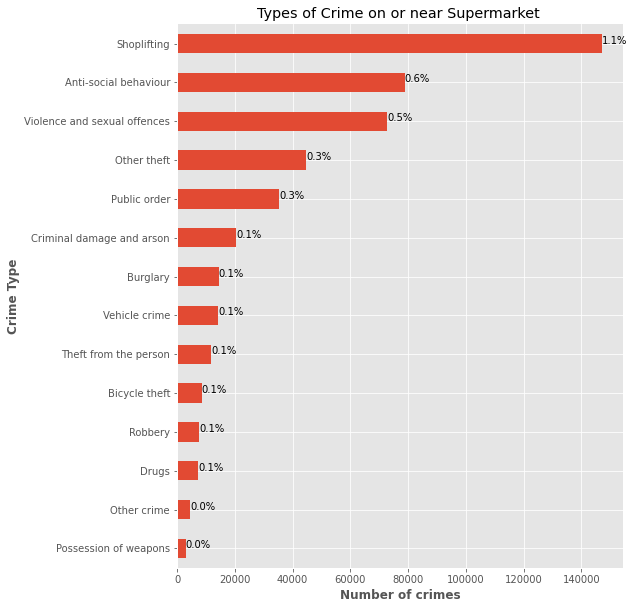

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,10))
sup['Crime type'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.ticklabel_format(style='plain', axis='x')

ax=plt.axes()
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
total = len(df['Reported by'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Types of Crime on or near Supermarket ')
plt.ylabel('Crime Type',weight='bold', size=12)
plt.xlabel('Number of crimes',weight='bold', size=12)
plt.show()

plt.savefig('sm.png')


In [ ]:
df.to_csv('Dataset')

In [ ]:
d=pd.read_csv('/content/Dataset')
d.shape

(14003199, 11)